<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1> Northeastern Transportation Analysis</h1> </center>
<center><h4>Benjamin Jacobson, Divit Koradia, Kyle Chu</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



Have you ever wondered what is the best way to get from Mission Hill to Northeastern campus and vice versa? When you’re in a rush, calculating the time of different transportation types can be tedious. Our goal is to find an answer to the best transportation type in terms of time traveling. We will be looking at MBTA, Uber, and Bluebikes. We will be comparing the average time it takes people to make it from Mission Hill to Northeastern and vice versa. Our datasets are pulled from the different transportation types websites. The data includes the time it takes to complete trips:
1. For Uber the time from pickup to drop off, 
2. For Bluebikes it’s time for a rider to go from one station to another
3. For MBTA Roxbury Crossing to Ruggles and Brigham Circle to Northeastern. 

In order to find the mean average time for each mode of transportation, we will add the following variables: 
wait time(if any) + walking time to pickup location (if any) + travel time from pickup to drop off  location + walking time from drop off location to final destination(if any). 

Our analysis consists of comparing the time it takes for each mode of transportation to reach from multiple point in Mission Hill to Northeastern University and vice-versa.

As Uber Boston does not release any pricing data, we chose Uber Chicago’s dataset to use for Machine Learning. As this dataset had tip data for every trip, we use machine learning to guess the tip amount a rider will give depending on a given ride. We took into account features such as the length and time of the ride and the day of the week.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

#### Problem Statement
The majority of students who live off campus live in Mission Hill. There are many modes of transportation to commute to and from campus from Mission Hill, but it’s hard to discern which is the most time efficient. We want to uncover which transportation method is most time effective in terms of time spent traveling, time spent waiting, and distance. We will be running additional analysis on Chicago’s Uber dataset in order to predict how customers tipped their drivers. 

##### Significance of the Problem
Why is it important to tackle this problem in your project?
It's important for us to find the best mode of transportation for each individual person as Northeastern has a very large demographic of students living/commuting to and from Mission Hill. Based on how prospective users value time traveling, distance, and wait-time, we'd like to show which mode of transportation would be the best fit.
In what ways could the insights from this project be useful?
This would allow students to better plan their commutes. We want to help students spend less time getting to campus and from campus, and more time to better themselves academically. 
Has there been previous work on your topic? Do some research into your topic. Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).
There hasn't been previous work on our topic. The most similar work we could find was from a UChicago research paper where they were able to show the trends of how passengers tipped their drivers. 
https://bfi.uchicago.edu/wp-content/uploads/BFI_WP_2019128.pdf


#### Questions/Hypothesis
End this section with a list of questions and hypotheses
You should tie these questions/hypotheses to the problem statement and its significance
e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:

Which mode of transportation is best?

Which mode of transportation has the lowest average trip time from point A to point B?

What features are most relevant when a rider is giving a tip?

Is there a correlation between our features and a rider giving a tip? <br/><br/>


H0: MBTA and Bluebikes >= Uber

H1: Uber < MBTA and Bluebikes

Average total commute time will be lowest for Uber <br/><br/>

H0: R^2 = 0

H1: R^2!= 0

There is a correlation between our features and a rider tipping


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset and variables. What do variables represent?


For finding BlueBike travel data, we went to the BlueBikes website and downloaded previous data. The website, https://www.bluebikes.com/system-data, provided data as excel files. There were 9 files, each representing a month from September 2018 to May 2019. These files contained the daily averages for travel time between Ruggles Bike Station and Roxbury Crossing Bike Station, as well as Brigham Circle Bike Station and Ruggles Bike Station. We merged all the excel files into one and performed data wrangling to extract the information required for our project. We used the following variables from the dataset: start station name, end station name, duration, start station id, end station id. For our Uber Boston dataset, we pulled data provided by Uber on https://movement.uber.com/explore/boston/. These files were downloaded in sets of three months (Uber has a date capacity set for downloads), and showed the average trip times between specified points in Boston. We were able to use the Uber website to specify pickup and dropoff locations, so we decided on taking trip times between three points in Mission Hill and two points around Northeastern’s campus. The dataset included variables such as origin name, destination name, date range, mean travel time, and the upper/lower bound of the range for average travel time. Our MBTA data came from: https://www.mbta.com/schedules/Orange/line and https://www.mbta.com/schedules/Green/line. We used the PDF posted at every train stop as it included wait times and trip times. We were interested in only the trips between Ruggles Station (Northeastern) and Roxbury Crossing Station (Mission Hill), and Northeastern Station (Northeastern) and Brigham Circle Station (Mission Hill). Based on the average wait time, we created a frequency chart that explains the frequency of a train arriving. That frequency chart is the average of all wait times across a full week. We acquired our walking data by using the MapQuest API. We used the API to create a dictionary of walking times from different stations to different Uber pickup and drop off points.


In acquiring our dataset for Uber Chicago, we downloaded provided by the City of Chicago at https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data. This was a large CSV that contained over 100 million rows of data. Each row described the start time, end time, pickup location, dropoff location, trip duration, fare, tip, and if it was a shared trip or not (boolean). We performed data wrangling to extract information from September 2018 to May 2019 which returned a sample of 50 million entries. To further reduce the data so that calculations don’t take forever, we ran a random function to pull a smaller sample of 1 million entries from the larger sample pool.

### 2.2. Variables
* If you are testing hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?


In our analysis of the Northeastern transportation problem, our independent variables are the various modes of transportation. Those include using BlueBikes, the MBTA Orange and Green lines, as well as Uber. The dependent variable is the total time spent traveling.

For the Uber Chicago problem, we defined our features to be Trip Seconds, Trip Distance, Pickup and Dropoff Community, Fare, Additional Charges, Shared Trip Authorize (whether or not the user has pool trips on), Trips Pooled (whether or not if another passenger was in the ride), and Trip Start and End Day. Our Target was the amount tipped. Our dependent variable is the amount of tip given.

### 2.3. Data Analysis
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables?
* Describe whether this is a supervised or unsupervised learning problem. Also identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? Why?


In order to achieve our objective of finding the most effective ways of reaching Northeastern’s campus from Mission Hill and vice versa, we had to create a set of baseline origins and destinations for traveling. As someone commuting wouldn’t walk to an Uber pickup location as they would to a train or bike station, we decided that our starting and ending locations would be from one of the Uber routes between Northeastern and Mission Hill. We’re going under the assumption that each Uber was called from someone’s home to campus or from campus to someone’s home. So, in finding the optimal mode of transportation between BlueBikes and the MBTA, we will implement the MapQuest API to calculate the walking time from the Uber pickup location to the nearest station, whether it be BlueBikes or MBTA Green or Orange Line. We will use the average travel time from the BlueBikes data to calculate the duration to the closest BlueBike dock near the Uber destination, and then use the MapQuest API to calculate the walking time to the Uber destination. The same method applies for checking the duration of a trip using the MBTA, however we will use our frequency chart to accurately account for the time spent waiting for a train. So for Bluebikes the total average trip time consists of the time it took to walk from the Uber origin to a Bluebikes station, the time it takes to ride the bike to the destination, and the time it takes to walk from the Bluebikes station to the Uber destination dropoff. MBTA total average trip time is very similar, except that in addition to the time it takes to ride the train and walk to the station we also included the average time it takes for a person to wait for a train to arrive at the station.

For our Uber Chicago Dataset, we defined our features to be Trip Seconds, Trip Distance, Pickup and Dropoff Community, Fare, Additional Charges, Shared Trip Authorize, Trips Pooled, and Trip Start and End Day. Our Target was the amount tipped. We will split into training and test data and create the following models Linear Regression, Ridge, Lasso, KNN Regressor and SVR. Using percentage split we will then determine our best model and optimize / test.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to extract your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [ ]:
import pandas as pd
import numpy as np
import requests
import glob 
import os
import pprint
import time
from datetime import date
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [1]:
data_sets = {}
git_url = './data_sets/' #'https://media.githubusercontent.com/media/kchu14/Northeastern-Transportation-Analysis/master/data_sets/'
data_sets['bluebikes_data_MH_NEU'] = pd.read_csv(f'{git_url}Bluebikes_Data_MH_NEU.csv')
data_sets['bluebikes_data_NEU_MH'] = pd.read_csv(f'{git_url}Bluebikes_Data_NEU_MH.csv')
#data_sets['uber_ids'] = pd.read_csv(f'{git_url}Uber_Data_IDs.csv')
data_sets['uber_mh_neu'] = pd.read_csv(f'{git_url}Uber_Data_MH_NEU.csv')
data_sets['uber_neu_mh'] = pd.read_csv(f'{git_url}Uber_Data_NEU_MH.csv')
data_sets['uber_neu_mh_monthly'] = pd.read_csv(f'{git_url}Uber_Data_NEU_MH_Monthly.csv')
data_sets['uber_mh_neu_monthly'] = pd.read_csv(f'{git_url}Uber_Data_MH_NEU_Monthly.csv')
data_sets['uber_tips'] = pd.read_csv(f'{git_url}Uber_Data_Tips.csv')
data_sets['MBTA'] = pd.read_csv(f'{git_url}MBTA_Data.csv')


In [3]:
def change_date_weekday(date_string):
    date_ar = date_string.split('/')
    return date(int(date_ar[2].split(' ')[0]), int(date_ar[0]), int(date_ar[1])).weekday()

uber_tips_ds = data_sets['uber_tips'].rename(columns={'Tip': 'target'}).drop(['Pickup Centroid Location', 'Dropoff Centroid Location', 'Trip Total'], axis=1).dropna()
uber_tips_ds['Trip Start Day'] = uber_tips_ds['Trip Start Timestamp'].apply(change_date_weekday)
uber_tips_ds['Trip End Day'] = uber_tips_ds['Trip End Timestamp'].apply(change_date_weekday)
uber_tips_ds['Trip Seconds'] = uber_tips_ds['Trip Seconds'].apply(lambda x:  x.replace(',', '') if isinstance(x, str) else x)


uber_tips_ds = uber_tips_ds.drop(['Trip Start Timestamp', 'Trip End Timestamp'], axis=1)

uber_tips_ds.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,target,Additional Charges,Shared Trip Authorized,Trips Pooled,Trip Start Day,Trip End Day
0,248,0.746336,3.0,3.0,2.5,0.0,2.55,False,1,1,1
1,900,5.371249,8.0,22.0,5.0,0.0,0.72,True,2,3,3
2,1009,5.669338,33.0,24.0,5.0,0.0,2.55,True,4,1,1
5,1753,8.373755,24.0,77.0,15.0,1.0,0.00,True,2,5,5
7,2331,8.767741,23.0,4.0,12.5,1.0,0.00,True,2,3,3


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


In [4]:
uber_stop_to_closest_station = {}
# Map of Uber stops to closest T and Bluebikes stations
# (green line, orange line, bikes)
brigham_t = '690 Huntington Avenue, Boston, MA 02115'
brigham_bike = '15 Francis Street, Boston, MA 02115'
ruggles_t = '835 Colombus Avenue, Boston, MA 02120'
ruggles_bike = '835 Colombus Avenue, Boston, MA 02120'
roxbury_t = '1400 Tremont St, Boston, MA 02120'
roxbury_bike = '1400 Tremont St, Boston, MA 02120'
northeastern_t = '360 Huntington Ave, Boston, MA'
uber_stop_to_closest_station['805 Columbus Ave, Boston, MA'] = (northeastern_t, ruggles_t, ruggles_bike)
uber_stop_to_closest_station['100 Saint Alphonsus Street, Mission Hill, Boston'] = (brigham_t, roxbury_t, brigham_bike)
uber_stop_to_closest_station['100 Fisher Avenue, Mission Hill, Boston'] = (brigham_t, roxbury_t, roxbury_bike)
uber_stop_to_closest_station['47 McGreevey Way, Mission Hill, Boston'] = (brigham_t, roxbury_t, brigham_bike)
uber_stop_to_closest_station['1534 Tremont St, Roxbury Crossing, MA'] = (brigham_t, roxbury_t, roxbury_bike) 
uber_stop_to_closest_station['40 Leon Street, Fenway/Kenmore, Boston'] = (northeastern_t, ruggles_t, ruggles_bike)
uber_stop_to_closest_station['360 Huntington Ave, Boston, MA'] = (northeastern_t, ruggles_t, ruggles_bike)

uber_stop_to_closest_station

{'805 Columbus Ave, Boston, MA': ('360 Huntington Ave, Boston, MA',
  '835 Colombus Avenue, Boston, MA 02120',
  '835 Colombus Avenue, Boston, MA 02120'),
 '100 Saint Alphonsus Street, Mission Hill, Boston': ('690 Huntington Avenue, Boston, MA 02115',
  '1400 Tremont St, Boston, MA 02120',
  '15 Francis Street, Boston, MA 02115'),
 '100 Fisher Avenue, Mission Hill, Boston': ('690 Huntington Avenue, Boston, MA 02115',
  '1400 Tremont St, Boston, MA 02120',
  '1400 Tremont St, Boston, MA 02120'),
 '47 McGreevey Way, Mission Hill, Boston': ('690 Huntington Avenue, Boston, MA 02115',
  '1400 Tremont St, Boston, MA 02120',
  '15 Francis Street, Boston, MA 02115'),
 '1534 Tremont St, Roxbury Crossing, MA': ('690 Huntington Avenue, Boston, MA 02115',
  '1400 Tremont St, Boston, MA 02120',
  '1400 Tremont St, Boston, MA 02120'),
 '40 Leon Street, Fenway/Kenmore, Boston': ('360 Huntington Ave, Boston, MA',
  '835 Colombus Avenue, Boston, MA 02120',
  '835 Colombus Avenue, Boston, MA 02120'),
 '

In [5]:
map_quest_api_url = 'http://www.mapquestapi.com/directions/v2/route'
api_key = 'siAvMEuUie853rP4T1v1Vuyfu3ndxR89'
walking_times = {}

for key, value in uber_stop_to_closest_station.items():
    PARAMS = {'key':api_key,'routeType':'pedestrian', 'from': key, 'to': value[0]} 
    r = requests.get(url = map_quest_api_url, params = PARAMS) 
    data1 = r.json() 
    time.sleep(.5)
    PARAMS = {'key':api_key,'routeType':'pedestrian', 'from': key, 'to': value[1]} 
    r = requests.get(url = map_quest_api_url, params = PARAMS) 
    data2 = r.json()
    PARAMS = {'key':api_key,'routeType':'pedestrian', 'from': key, 'to': value[2]} 
    r = requests.get(url = map_quest_api_url, params = PARAMS) 
    data3 = r.json()
     
#     print(f'Time it takes to walk from {key} to {value[0]} is {data1["route"]["formattedTime"]}')
#     print(f'Time it takes to walk from {key} to {value[1]} is {data2["route"]["formattedTime"]}')
    walking_times[key] = (data1["route"]["formattedTime"],  data2["route"]["formattedTime"], data3["route"]["formattedTime"])
    
walking_times

{'805 Columbus Ave, Boston, MA': ('00:09:26', '00:02:17', '00:02:17'),
 '100 Saint Alphonsus Street, Mission Hill, Boston': ('00:05:40',
  '00:08:22',
  '00:07:29'),
 '100 Fisher Avenue, Mission Hill, Boston': ('00:15:20',
  '00:16:16',
  '00:16:16'),
 '47 McGreevey Way, Mission Hill, Boston': ('00:07:08',
  '00:08:47',
  '00:11:25'),
 '1534 Tremont St, Roxbury Crossing, MA': ('00:06:16', '00:06:01', '00:06:01'),
 '40 Leon Street, Fenway/Kenmore, Boston': ('00:07:00',
  '00:07:17',
  '00:07:17'),
 '360 Huntington Ave, Boston, MA': ('00:00:00', '00:08:02', '00:08:02')}

In [6]:
# Bluebikes average times

# get the average time from station to station
bluebike_avg_times = {}
group_by_start_NEU_MH = pd.DataFrame(data_sets['bluebikes_data_NEU_MH'].groupby(['start station name', 'end station name']).mean()['tripduration'])
group_by_start_MH_NEU = pd.DataFrame(data_sets['bluebikes_data_MH_NEU'].groupby(['start station name', 'end station name']).mean()['tripduration'])
# From - To


bluebike_avg_times[' - '.join(group_by_start_NEU_MH.index[0])] = group_by_start_NEU_MH.iloc[0]['tripduration']
bluebike_avg_times[' - '.join(group_by_start_NEU_MH.index[1])] = group_by_start_NEU_MH.iloc[1]['tripduration']
bluebike_avg_times[' - '.join(group_by_start_MH_NEU.index[0])] = group_by_start_MH_NEU.iloc[0]['tripduration']
bluebike_avg_times[' - '.join(group_by_start_MH_NEU.index[1])] = group_by_start_MH_NEU.iloc[1]['tripduration']

bluebike_avg_times


{'835 Colombus Avenue, Boston, MA 02120 - 1400 Tremont St, Boston, MA 02120': 313.9508408796895,
 '835 Colombus Avenue, Boston, MA 02120 - 15 Francis Street, Boston, MA 02115': 516.3309352517986,
 '1400 Tremont St, Boston, MA 02120 - 835 Colombus Avenue, Boston, MA 02120': 342.1673346693387,
 '15 Francis Street, Boston, MA 02115 - 835 Colombus Avenue, Boston, MA 02120': 660.5757575757576}

In [7]:
# MBTA average times

# get the average time from station to station
data_sets['MBTA']
MBTA_avg_times = {}
data_sets['MBTA']['Total Time'] = data_sets['MBTA']['Frequency'] + data_sets['MBTA']['Travel Time']
for i in range(4):
    MBTA_avg_times[f'{data_sets["MBTA"].iloc[i]["Start Station"]} - {data_sets["MBTA"].iloc[i]["End Station"]}'] = data_sets["MBTA"].iloc[i]["Total Time"]
                   
MBTA_avg_times                   
               

{'690 Huntington Avenue, Boston, MA 02115 - 360 Huntington Ave, Boston, MA': 867.6,
 '360 Huntington Ave, Boston, MA - 690 Huntington Avenue, Boston, MA 02115': 927.6,
 '835 Colombus Avenue, Boston, MA 02120 - 1400 Tremont St, Boston, MA 02120': 646.8,
 '1400 Tremont St, Boston, MA 02120 - 835 Colombus Avenue, Boston, MA 02120': 646.8}

In [8]:
# Total times
neu_mh = data_sets['uber_neu_mh_monthly'].copy().drop(['Origin Movement ID', 'Destination Movement ID', 'Range - Lower Bound Travel Time (Seconds)', 'Range - Upper Bound Travel Time (Seconds)'], axis=1)
mh_neu = data_sets['uber_mh_neu_monthly'].copy().drop(['Origin Movement ID', 'Destination Movement ID', 'Range - Lower Bound Travel Time (Seconds)', 'Range - Upper Bound Travel Time (Seconds)'], axis=1)

neu_mh.rename(columns={'Mean Travel Time (Seconds)': 'Uber Mean Travel Time'}, inplace = True)
mh_neu.rename(columns={'Mean Travel Time (Seconds)': 'Uber Mean Travel Time'}, inplace = True)

In [9]:
neu_mh.head()

,Origin Display Name,Destination Display Name,Date Range,Uber Mean Travel Time
0,"805 Columbus Ave, Boston, MA","100 Saint Alphonsus Street, Mission Hill, Boston","9/11/2018 - 11/10/2018, Every day, Daily Average",296
1,"805 Columbus Ave, Boston, MA","100 Fisher Avenue, Mission Hill, Boston","9/11/2018 - 11/10/2018, Every day, Daily Average",444
2,"805 Columbus Ave, Boston, MA","47 McGreevey Way, Mission Hill, Boston","9/11/2018 - 11/10/2018, Every day, Daily Average",207
3,"360 Huntington Ave, Boston, MA","100 Saint Alphonsus Street, Mission Hill, Boston","9/11/2018 - 11/10/2018, Every day, Daily Average",305
4,"360 Huntington Ave, Boston, MA","100 Fisher Avenue, Mission Hill, Boston","9/11/2018 - 11/10/2018, Every day, Daily Average",472


In [21]:
#calculating green and orange line mean travel time from northeastern to mission hill
green_line_time_neu_mh = []
orange_line_time_neu_mh = []
for index, row in neu_mh.iterrows():
    start_stop = row['Origin Display Name']
    end_stop = row['Destination Display Name']
    #finding the nearest green/orange line station from start and end uber destination
    closest_green_mbta_start_station = uber_stop_to_closest_station[start_stop][0]
    closest_green_mbta_end_station = uber_stop_to_closest_station[end_stop][0]
    closest_orange_mbta_start_station = uber_stop_to_closest_station[start_stop][1]
    closest_orange_mbta_end_station = uber_stop_to_closest_station[end_stop][1]
    #finding the walking time to the nearest green/orange line from start and end uber destination
    walking_from_start_green_line = walking_times[start_stop][0]
    walking_from_end_green_line = walking_times[end_stop][0]
    walking_from_start_orange_line = walking_times[start_stop][1]
    walking_from_end_orange_line = walking_times[end_stop][1]
    green_line = closest_green_mbta_start_station + " - " + closest_green_mbta_end_station
    orange_line = closest_orange_mbta_start_station + " - " + closest_orange_mbta_end_station
    #changing the format from datetime to seconds for calculations
    walking_time_from_start_green_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start_green_line.split(":"))) 
    walking_time_from_end_green_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end_green_line.split(":")))
    walking_time_from_start_orange_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start_orange_line.split(":"))) 
    walking_time_from_end_orange_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end_orange_line.split(":")))
    #retreiving the travel time for green and orange line
    green_line_travel_time = MBTA_avg_times[green_line]
    orange_line_travel_time = MBTA_avg_times[orange_line]
    #calculating the total mean travel time for green/orange line
    total_time_green_line = float(green_line_travel_time) + float(walking_time_from_start_green_line) + float(walking_time_from_end_green_line)
    green_line_time_neu_mh.append(total_time_green_line)
    total_time_orange_line = float(orange_line_travel_time) + float(walking_time_from_start_orange_line) + float(walking_time_from_end_orange_line)
    orange_line_time_neu_mh.append(total_time_orange_line)

#appending the green and orange line mean travel time to the neu_mh dataframe
neu_mh["Green Line Mean Travel Time"] = green_line_time_neu_mh
neu_mh["Orange Line Mean Travel Time"] = orange_line_time_neu_mh

#calculating blue bikes mean travel time from northeastern to mission hill
bluebike_time_neu_mh = []
for index, row in neu_mh.iterrows():
    start_stop = row['Origin Display Name']
    end_stop = row['Destination Display Name']
    walking_from_start = walking_times[start_stop][2]
    walking_from_end = walking_times[end_stop][2]
    #finding the nearest blue bike station from start and end uber destination
    closest_bike_start_station = uber_stop_to_closest_station[start_stop][2]
    closest_bike_end_station = uber_stop_to_closest_station[end_stop][2]
    string = closest_bike_start_station + " - " + closest_bike_end_station
    travel_time = bluebike_avg_times[string]
    #changing the format from datetime to seconds for calculations
    walking_time_from_start = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start.split(":"))) 
    walking_time_from_end = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end.split(":")))
    #calculating the toal mean travel time for blue bikes
    total_time = float(travel_time) + float(walking_time_from_start) + float(walking_time_from_end)
    bluebike_time_neu_mh.append(total_time)
#appending the blue bikes mean travel time to the neu_mh dataframe
neu_mh['Blue Bike Mean Travel Time'] = bluebike_time_neu_mh

In [22]:
neu_mh.groupby(['Origin Display Name', 'Destination Display Name']).mean()

Uber Mean Travel Time  \
Origin Display Name            Destination Display Name                                                  
360 Huntington Ave, Boston, MA 100 Fisher Avenue, Mission Hill, Boston                      486.000000   
                               100 Saint Alphonsus Street, Mission Hill, Boston             304.666667   
                               47 McGreevey Way, Mission Hill, Boston                       197.666667   
805 Columbus Ave, Boston, MA   100 Fisher Avenue, Mission Hill, Boston                      451.000000   
                               100 Saint Alphonsus Street, Mission Hill, Boston             294.333333   
                               47 McGreevey Way, Mission Hill, Boston                       204.666667   

                                                                                 Green Line Mean Travel Time  \
Origin Display Name            Destination Display Name                                                        
360 Huntington Ave, Boston, MA 100 Fisher Avenue, Mission Hill, Boston                                1847.6   
                               100 Saint Alphonsus Street, Mission Hill, Boston                       1267.6   
                               47 McGreevey Way, Mission Hill, Boston                                 1355.6   
805 Columbus Ave, Boston, MA   100 Fisher Avenue, Mission Hill, Boston                                2413.6   
                               100 Saint Alphonsus Street, Mission Hill, Boston                       1833.6   
                               47 McGreevey Way, Mission Hill, Boston                                 1921.6   

                                                                                 Orange Line Mean Travel Time  \
Origin Display Name            Destination Display Name                                                         
360 Huntington Ave, Boston, MA 100 Fisher Avenue, Mission Hill, Boston                                 2104.8   
                               100 Saint Alphonsus Street, Mission Hill, Boston                        1630.8   
                               47 McGreevey Way, Mission Hill, Boston                                  1655.8   
805 Columbus Ave, Boston, MA   100 Fisher Avenue, Mission Hill, Boston                                 1759.8   
                               100 Saint Alphonsus Street, Mission Hill, Boston                        1285.8   
                               47 McGreevey Way, Mission Hill, Boston                                  1310.8   

                                                                                 Blue Bike Average Time  \
Origin Display Name            Destination Display Name                                                   
360 Huntington Ave, Boston, MA 100 Fisher Avenue, Mission Hill, Boston                      1771.950841   
                               100 Saint Alphonsus Street, Mission Hill, Boston             1447.330935   
                               47 McGreevey Way, Mission Hill, Boston                       1683.330935   
805 Columbus Ave, Boston, MA   100 Fisher Avenue, Mission Hill, Boston                      1426.950841   
                               100 Saint Alphonsus Street, Mission Hill, Boston             1102.330935   
                               47 McGreevey Way, Mission Hill, Boston                       1338.330935   

                                                                                 Blue Bike Mean Time  \
Origin Display Name            Destination Display Name                                                
360 Huntington Ave, Boston, MA 100 Fisher Avenue, Mission Hill, Boston                   1771.950841   
                               100 Saint Alphonsus Street, Mission Hill, Boston          1447.330935   
                               47 McGreevey Way, Mission Hill, Boston                    1683.330935   
805 Columbus Ave, Boston, MA   100 Fisher Avenue, Mis

In [30]:
#calculating green and orange line mean travel time from mission hill to northeastern
green_line_time_mh_neu = []
orange_line_time_mh_neu = []
for index, row in mh_neu.iterrows():
    start_stop = row['Origin Display Name']
    end_stop = row['Destination Display Name']
    #finding the nearest green/orange line station from start and end uber destination
    closest_green_mbta_start_station = uber_stop_to_closest_station[start_stop][0]
    closest_green_mbta_end_station = uber_stop_to_closest_station[end_stop][0]
    closest_orange_mbta_start_station = uber_stop_to_closest_station[start_stop][1]
    closest_orange_mbta_end_station = uber_stop_to_closest_station[end_stop][1]
    #finding the walking time to the nearest green/orange line from start and end uber destination
    walking_from_start_green_line = walking_times[start_stop][0]
    walking_from_end_green_line = walking_times[end_stop][0]
    walking_from_start_orange_line = walking_times[start_stop][1]
    walking_from_end_orange_line = walking_times[end_stop][1]
    green_line = closest_green_mbta_start_station + " - " + closest_green_mbta_end_station
    orange_line = closest_orange_mbta_start_station + " - " + closest_orange_mbta_end_station
    #changing the format from datetime to seconds for calculations
    walking_time_from_start_green_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start_green_line.split(":"))) 
    walking_time_from_end_green_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end_green_line.split(":")))
    walking_time_from_start_orange_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start_orange_line.split(":"))) 
    walking_time_from_end_orange_line = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end_orange_line.split(":")))
    #retreiving the travel time for green and orange line
    green_line_travel_time = MBTA_avg_times[green_line]
    orange_line_travel_time = MBTA_avg_times[orange_line]
    #calculating the total mean travel time for green/orange line
    total_time_green_line = float(green_line_travel_time) + float(walking_time_from_start_green_line) + float(walking_time_from_end_green_line)
    green_line_time_mh_neu.append(total_time_green_line)
    total_time_orange_line = float(orange_line_travel_time) + float(walking_time_from_start_orange_line) + float(walking_time_from_end_orange_line)
    orange_line_time_mh_neu.append(total_time_orange_line)

#appending the green and orange line mean travel time to the mh_neu dataframe
mh_neu["Green Line Mean Travel Time"] = green_line_time_mh_neu
mh_neu["Orange Line Mean Travel Time"] = orange_line_time_mh_neu

#calculating blue bikes mean travel time from mission hill to northeastern
bluebike_time_mh_neu = []
for index, row in mh_neu.iterrows():
    start_stop = row['Origin Display Name']
    end_stop = row['Destination Display Name']
    walking_from_start = walking_times[start_stop][1]
    walking_from_end = walking_times[end_stop][1]
    #finding the nearest  blue bike station from start and end uber destination
    closest_bike_start_station = uber_stop_to_closest_station[start_stop][1]
    closest_bike_end_station = uber_stop_to_closest_station[end_stop][1]
    string = closest_bike_start_station + " - " + closest_bike_end_station
    travel_time = bluebike_avg_times[string]
    #changing the format from datetime to seconds for calculations
    walking_time_from_start = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_start.split(":"))) 
    walking_time_from_end = sum(x * int(t) for x, t in zip([3600, 60, 1], walking_from_end.split(":")))
    #calculating the toal mean travel time for blue bikes
    total_time = float(travel_time) + float(walking_time_from_start) + float(walking_time_from_end)
    bluebike_time_mh_neu.append(total_time)
    
#appending the blue bikes mean travel time to the mh_neu dataframe
mh_neu['Blue Bike Mean Travel Time'] = bluebike_time_mh_neu

In [31]:
mh_neu.groupby(['Origin Display Name', 'Destination Display Name']).mean()

Uber Mean Travel Time  \
Origin Display Name                   Destination Display Name                                        
1534 Tremont St, Roxbury Crossing, MA 360 Huntington Ave, Boston, MA                     481.000000   
                                      40 Leon Street, Fenway/Kenmore, Boston             310.333333   

                                                                              Green Line Mean Travel Time  \
Origin Display Name                   Destination Display Name                                              
1534 Tremont St, Roxbury Crossing, MA 360 Huntington Ave, Boston, MA                               1243.6   
                                      40 Leon Street, Fenway/Kenmore, Boston                       1663.6   

                                                                              Orange Line Mean Travel Time  \
Origin Display Name                   Destination Display Name                                               
1534 Tremont St, Roxbury Crossing, MA 360 Huntington Ave, Boston, MA                                1489.8   
                                      40 Leon Street, Fenway/Kenmore, Boston                        1444.8   

                                                                              Blue Bike Average Time  \
Origin Display Name                   Destination Display Name                                         
1534 Tremont St, Roxbury Crossing, MA 360 Huntington Ave, Boston, MA                     1185.167335   
                                      40 Leon Street, Fenway/Kenmore, Boston             1140.167335   

                                                                              Blue Bike Mean Travel Time  
Origin Display Name                   Destination Display Name                                            
1534 Tremont St, Roxbury Crossing, MA 360 Huntington Ave, Boston, MA                         1185.167335  
                                      40 Leon Street, Fenway/Kenmore, Boston                 1140.167335

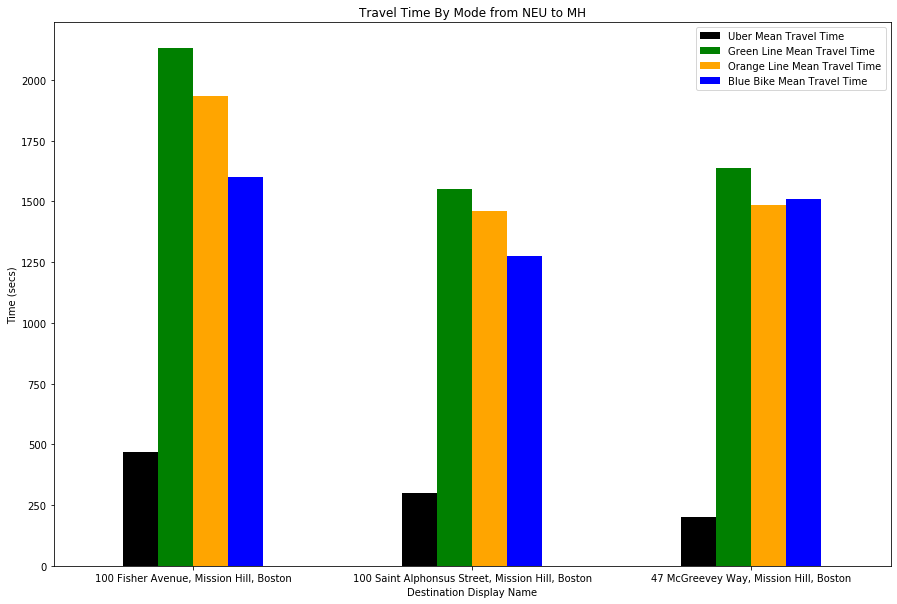

In [32]:
import matplotlib.pyplot as plt


neuGraph=neu_mh.groupby('Destination Display Name').mean()


# df.plot(x="X", y=["A", "B", "C"], kind="bar")
ax = neuGraph[['Uber Mean Travel Time','Green Line Mean Travel Time', 'Orange Line Mean Travel Time',
              'Blue Bike Mean Travel Time']].plot(kind='bar', title='Travel Time By Mode from NEU to MH', figsize=(15,10), legend= True,
                                              color=['black', 'green', 'orange', 'blue'])

ax.set_ylabel('Time (secs)')
ax.set_xticklabels(neuGraph.index, rotation=0)
plt.show()

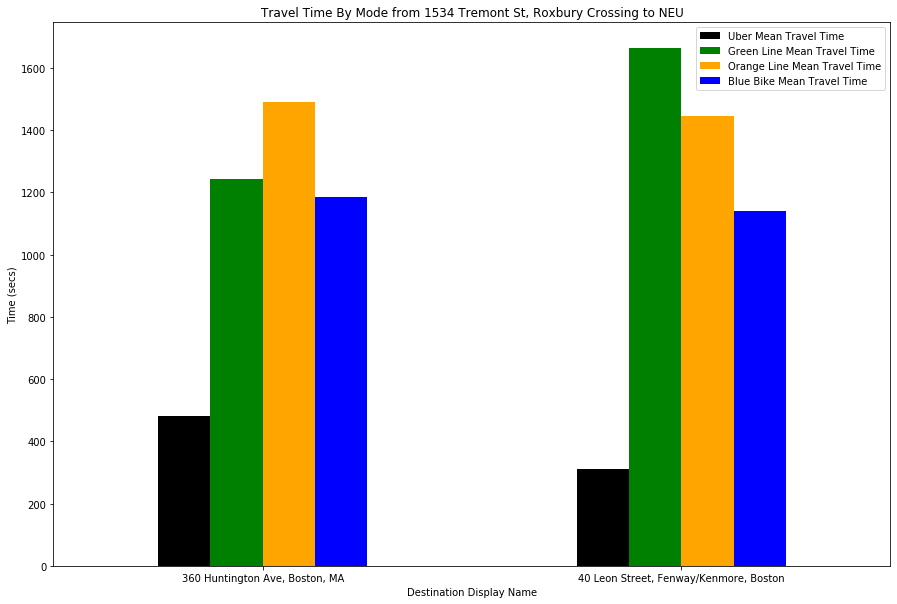

In [33]:
mhGraph=mh_neu.groupby('Destination Display Name').mean()


# df.plot(x="X", y=["A", "B", "C"], kind="bar")
ax = mhGraph[['Uber Mean Travel Time','Green Line Mean Travel Time', 'Orange Line Mean Travel Time',
              'Blue Bike Mean Travel Time']].plot(kind='bar', title='Travel Time By Mode from 1534 Tremont St, Roxbury Crossing to NEU', figsize=(15,10), legend= True,
                                              color=['black', 'green', 'orange', 'blue'])

ax.set_ylabel('Time (secs)')
ax.set_xticklabels(mhGraph.index, rotation=0)
plt.show()






### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

In [ ]:
def features_and_target(df):
      return df.drop("target", axis = 1), df['target']

In [ ]:
features, target = features_and_target(uber_tips_ds.sample(10000))

In [ ]:
def split_the_dataset():
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)  
    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = split_the_dataset()

In [ ]:
estimators = {
    'LinearRegression': LinearRegression().fit(X=X_train, y=y_train), 
    'Ridge': Ridge().fit(X=X_train, y=y_train),
    'Lasso': Lasso().fit(X=X_train, y=y_train),
    'KNeighborsRegressor':  KNeighborsRegressor().fit(X=X_train, y=y_train),
    'SVR': SVR(gamma='scale', C=1).fit(X=X_train, y=y_train)}

In [ ]:
def regressors_percentage_split():
    for key, value in estimators.items():
        print(key)
        print("    R-squared value for training set: ", r2_score(y_train, value.predict(X_train)))
        print("    R-squared value for testing set: ", r2_score(y_test, value.predict(X_test)))
    

In [ ]:
regressors_percentage_split()

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [ ]:
def preprocessed_regression():
    #create the scaler
    scaler = MinMaxScaler()
    #fit the scaler to the training data(features only)
    scaler.fit(X_train) 
    #transform X_train and X_test based on the (same) scaler
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    for key, value in estimators.items():
        print(key)
        
        if 'Linear' in key:
            model = LinearRegression().fit(X=X_train_scaled, y=y_train)
        if 'Ridge' in key:
            model = Ridge().fit(X=X_train_scaled, y=y_train)
        if 'Lasso' in key:
            model = Lasso().fit(X=X_train_scaled, y=y_train)
        if 'KNeighborsRegressor' in key:
            model = KNeighborsRegressor().fit(X=X_train_scaled, y=y_train)
        if 'SVR' in key:
            model = SVR(gamma='scale', C=1).fit(X=X_train_scaled, y=y_train)

        print("    R^2 for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
        print("    R^2 for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))
    return X_train_scaled, X_test_scaled 
   

In [ ]:
    X_train_scaled, X_test_scaled = preprocessed_regression()

In [ ]:
def RFE_feature_selection():
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
    #fit the RFE selector to the training data
    select.fit(X_train, y_train)

    #transform training and testing sets so only the selected features are retained
    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)
    model = LinearRegression().fit(X=X_train_selected, y=y_train)
    print('Selected features after RFE:')
    features_bool = np.array(select.support_)
    cols = np.array(features.columns)
    result = cols[features_bool]
    [print("   ", i) for i in result ]
 
    print("Linear Regression performance with selected features:")
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))
    return X_train_selected, X_test_selected

In [ ]:
X_train_selected, X_test_selected = RFE_feature_selection()

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

In [ ]:
model = LinearRegression().fit(X=X_train, y=y_train)

print("Original results:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))


model = LinearRegression().fit(X=X_train_selected, y=y_train)

print("With selected features:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
        We compared Linear Regression, Ridge, Lasso, KNN, and SVR on our Uber Chicago data set
    * Which algorithm(s) revealed best performance?
        We determined that Linear Regression performed the best.
    * Which algorithm(s) should be used for your predictive model?
        Linear Regression should be used for our predictive model because it has the highest r^2 for our training set.
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?

#### Northeastern Transportation

#### Machine Learning Uber Tips
  We hypothesized that the longer the trip the larger the tip amount. Based off of our findings we found that trip time and duration were important features. We also found that there was a positive R^2 value for our features indicating a relation with longer trips and larger tips. Wedetermined that Linear Regression was the best model for our dataset. It had the highest R^2 value. We then used MinMaxScaler to optimize our models. We were then able to calculate the selected features that most impacted our target variable Tip they were Trip Seconds, Trip Miles, and Additional Charges.<br/><br/>


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

Future researchers should try and get more Uber pickup and dropoffs near campus. We were limited to using the Uber data provided by their site. The public data available grouped together many trips into one origin location and one destination location. For example any trip that was near ISEC was grouped into an ISEC trip location. Sometimes Uber would also limit trips recorded to one way. For example some stops going from Mission Hill to Northeastern had data but the same trip from the same location going in the reverse direction was unavailble. This was a limitation of Uber's publically available data. In the future you could create a business account for Uber and access data using their API. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 